**Biodata**
* Nama     : Rachel Gultom
* Email    : rachelgultom5@gmail.com
* Domisili : Asahan,Sumatera Utara
* Github (termasuk README.MD) : https://github.com/RachelGultom2000/Submission1_PredictiveAnalytics_MLTerapan
* Drive (Dataset) : https://drive.google.com/drive/folders/1w8KZ34YMEjLOuv6qs8ebfAA1XZ75kbpz?usp=sharing
Submission1_PredictiveAnalytics_MLTerapan
* Nama Tugas : Submission 1 - ML Terapan


## Prediksi Penyakit Stroke dengan Menggunakan Algoritma Logistic Regression ##

### Metode :
- Logistic Regression
- Random Forest

Import Library seperti Pandas,Scikit-learn,Searborn dan lainnya

In [35]:
# Import Library

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

import seaborn as sns

# Pre-Processing
## Beriku adalah langkah-langkah dalam melakukan preprocessing :
1. Melakukan load dataset ke dalam data frame
2. Memberikan tanda *numerical features* dari data dalam mempermudah proses scalling
3. Melakukan drop kolom untuk gender,ever_married,work_type,Residence_type dan smoking_status karena mesin tidak bisa membaca tipe data string (seharusnya bisa dengan convert,tetapi tidak disarankan karena berpotensi merusak akurasi data)
4. Mengisi missing value dengan nilai median.Missing value adalah kondisi dimana sebuah kolom tidak memiliki nilai atau NaN.Dengan median,data akan kembali di normalkan sehingga akan mempengarungi kebaikan dataset.
5. Melakukan pemisahan antara dataset train dan dataset test dengan proporsi pembagian :
  - 75% untuk data latih(train)
  - 25% untuk data uji(test)
6. Scalling dengan menggunakan Standard Scaler dari sklearn berfungsi agar fitur numerik dapat diproses lebih mudah oleh si mesin dalam proses modelling.

## Melakukan load dataset (memamasukkan dataset atau membaca) & Memberikan tanda pada num features.
Load dataset ke dalam dataframe

In [22]:
# Menampilkan dataset

df = pd.read_csv('stroke_dataset.csv')
numerical_features = ['heart_disease','avg_glucose_level','bmi','age']
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Drop Column 
Melakukan drop terhadap kolom adalah salah satu cara yang baik agar model menjadi lebih baik karena terkadang si mesin tidak bisa membaca kolom yang bertipe data string.

In [23]:
# Menghapus kolom dataset yang tidak diperlukan

df.drop(columns=['gender','ever_married', 'work_type', 'Residence_type','smoking_status'], inplace=True)
 
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


##  Mengecek Nilai NaN
Melakukan pengecekan terhadap setiap kolom untuk menemukan apakah ada yang mengandung missing value atau NaN

In [24]:
# Mengecek apakah kolom mengandung missing value atau nilai NaN

for i in df.columns :
  print (i+": "+str(df[i].isna().sum()))

id: 0
age: 0
hypertension: 0
heart_disease: 0
avg_glucose_level: 0
bmi: 201
stroke: 0


# Mengatasi Missing Value
Salah satu caranya adalah dengan mengisinya dengan nilai median(tengah).Missing Value akan membuat kolom tersebut tidak dapat diproses dan harus diisi jika ingin diproses.Pengisian data menggunakan nilai median akan membantu dalam menormalkan data yang hilang akibat kesalahan teknis dataset dan mempengarungi model tentunya.

In [25]:
# Mengisi nilai atau data kosong pada dataset dengan median dari kolom.

df['hypertension'] = df['hypertension'].fillna(df['hypertension'].median())
df['heart_disease'] = df['heart_disease'].fillna(df['heart_disease'].median())
df['stroke'] = df['stroke'].fillna(df['stroke'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['avg_glucose_level'] = df['avg_glucose_level'].fillna(df['avg_glucose_level'].median())
df['age'] = df['age'].fillna(df['age'].median())

## Melakukan Pengecekan Nilai NaN (2)
Melakukan pengecekan kembali apakah ada kolom yang mengandung nilai NaN atau tidak dengan tujuan agar proses selanjutnya bisa berjalan dengan baik

In [26]:
# Memerika pada setiap kolom diatas untuk mencari nilai kosong atau missing value (NaN) setelah tahap pre-processing

for i in df.columns:
  print(i+" :" + str(df[i].isna().sum()))

id :0
age :0
hypertension :0
heart_disease :0
avg_glucose_level :0
bmi :0
stroke :0


Menampilkan data dari hasil pre-processing

In [27]:
# Tampilkan data hasil preprocessing
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Mendefinisikan X dan y
Ini merupakan salah satu tahap yang berhubungan dengan model.
- X adalah variabel yang menjadi tolak ukur untuk melakukan prediksi.
- y merupakan variabel yang menjadi tujuan dari hasil prediksinya


In [28]:
# Definisikan variabel X dan y sebagai bahan melakukan prediksi

X = df.drop('stroke',axis='columns')
y = df['stroke']

## Split Train-Test dan Standard Scalling.

Memisah antara data train dan data test adalah bagian terpenting dari proses machine learning dimana ini bertujuan agar hasil akurasi dan model dapat diketahui.
Proporsi pembagiannya adalah
- 75% untuk data latih (train)
- 25% untuk data uji (test)

Dilanjutkan dengan melakukan standard scalling untuk data data numerik.
Scalling dilakukan dengan library Standard Scaller dari sklearn.Tujuannya agar fitur numerik dapat diproses lebih mudah pada tahap modelling.

In [29]:
# Pemisahan Dataset dan Scalling terhadap variabel

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# import StandardScaler
scaler = StandardScaler()

# fit dan transform untuk data trainning
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

# transform untuk data testing
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

# Modelling (Pemilihan Algoritma)
Pembuatan model didasari oleh 2 algoritma yang dipilih,yaitu :

- Logistic Regression <br>
Digunakan untuk melakukan prediksi probabilitas kejadian suatu peristiwa dengan mencocokan datanya ke fungsi logit kurva logistik.

- Random Forest <br>
Merupakan salah satu metode dalam Decision Tree dimana pohon keputusan utuh terbentuk dari banyak decision tree atau estimators yang memberikan pendapat masing masing dengan bentuk pohon kecil.Random Forest memiliki ketergantungan terhadap Decision Tree.

Penggunaan Model <br>
Berdasarkan hasil tersebut,maka dapat dilihat bahwa akurasi model dari Logistic Regression jauh lebih tinggi atau melewati standard dibandingkan dengan algoritma Random Forest.Maka kesimpulannya,algoritma Logistic Regression menjadi pilihan yang tepat.

In [32]:
# Mendefinisikan Model dan Metode yang akan dibentuk

logRes_model = LogisticRegression(max_iter=1000)
RF_model = RandomForestRegressor(n_estimators=1000,
            max_depth=16, random_state=55, n_jobs=1)

## Melakukan Trainning pada kedua algoritma atau metode.
Melakukan trainning atau fitting terhadap kedua algoritma menggunakan dataset yang sama yaitu data train dan menggunakan fit untuk sintaksnya

In [33]:
# Melakukan fitting(latih) terhadap model menggunakan dataset train pada 2 model
# yaitu Logistic Regression dan Random Forest Regressor

logRes_model.fit(X_train,y_train)
RF_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=1, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

## Proses Testing Model
Melakukan testing pada data test dengan prediksi data yang ada pada dataset test lalu menampilkannya dalam bentuk akurasi.

In [44]:
# Melakukan prediksi terhadap dataset test dan menampilkan hasilnya

logRes_y_pred = logRes_model.predict(X_test)
RF_y_pred = RF_model.predict(X_test)

print("Akurasi algoritma Logistic Regression : {}".format(logRes_model.score(X_test,y_test).round(3)))
print("Akurasi algoritma Random Forest : \t : {} ".format(RF_model.score(X_test,y_test).round(3)))

Akurasi algoritma Logistic Regression : 0.937
Akurasi algoritma Random Forest : 	 : 0.039 


## Hasil Model Test
Berdasarkan hasil tersebut , maka dapat dilihat bahwa akurasi dari algoritma Logistic Regression memiliki akurasi yang jauh lebih tinggi dari Random Forest yaitu sebesar 0.937 atau 93%.

# Evaluasi
Dalam proses evaluasi, disajikan informasi mengenai algoritma yang dipilih yaitu Logistic Regression serta penjelesan mengenai perbandinganya dengan algoritma Random Forest,dalam kasus ini yaitu :
- Akurasi
- MSE (Mean Squared Error)

Penjelasan lebih lanjut mengenai algoritma yang dipilih ialah :
- Bobot dan nilai bias dari algoritma
- Visualisasi Heatmap dari Confussion Matrix

## Metrik #1 : Akurasi
Dari hasil yang didapatkan, akurasi yang dihasilkan Logistic Regression lebih tinggi dari Random Forest dan terlihat memiliki rentang nilai yang cukup jauh dimana Logistic Regression mencapai 0.937 sedangkan Random Forest hanya 0.039.

In [49]:
# Metrik 1 : Akurasi, perbandingan kedua model diatas.

print("Akurasi algoritma Logistic Regression: {}".format(logRes_model.score(X_test,y_test).round(3)))
print("Akurasi algoritma Random Forest\t: {}".format(RF_model.score(X_test,y_test).round(3)))

Akurasi algoritma Logistic Regression: 0.937
Akurasi algoritma Random Forest	: 0.039


## Metrik #2: MSE
Melakukan pengecekan dengan menggunakan MSE pada algoritma Linear Regression dan Random Forest. Dalam bagian ini disajikan sebuah grafik dari perbandingan kedua algoritma

In [50]:
# Metrik 2 : MSE,mengecek Mean Squared Error(MSE) pada kedua model diatas.

mse = pd.DataFrame(columns=['train', 'test'], index=['LogRes','RF'])
dict_model = {'LogRes': logRes_model, 'RF': RF_model}
for name, model in dict_model.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
mse

,train,test
LogRes,4.41023e-05,6.25978e-05
RF,6.05221e-06,5.63667e-05


Menampilkan hasil plotting MSE dalam perbandingan kedua algoritma.

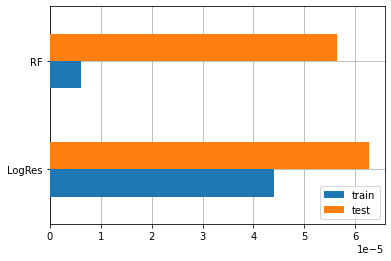

In [51]:
# Tampilkan hasil plotting MSE

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Bobot dan nilai bias Logsitic Regression

Mencari bobot dari masing masing variabel yang ada dalam Linear Regression dengan tujuan untuk mengetahui nilai dari nilai bobot pada setiap variabel dan nilai bias dari setelah dilakukan sejumlah N perulangan

In [52]:
# Mencari nilai bobot dari masing masing variabel yang terdapat dalam model

print("Nilai Bobot Tiap Variabel:\n{}\n\nNilai Bias: {}\n\nBanyaknya iterasi: {}".format(logRes_model.coef_[0], logRes_model.intercept_[0], logRes_model.n_iter_[0]))

Nilai Bobot Tiap Variabel:
[-8.22448143e-05  1.40046937e-08  3.40344466e-10  7.24949592e-09
  7.50655055e-09  2.37432385e-09]

Nilai Bias: -2.1551376789831707e-08

Banyaknya iterasi: 8


## Confussion Matric Logistic Regression
Menciptakan confussion matrix untuk mengetahui letak prediksi yang salah maupun prediksi yang benar pada saat mesin sedang melakukan proses prediksi.

In [53]:
# Membuat Confussion Matrix agar dapat mencari kesalahan dalam prediksi model (akurasi)

logRes_cn = confusion_matrix(y_test,logRes_y_pred)
print("Confusion Matrix Logistic Regression: \n{}".format(logRes_cn))

Confusion Matrix Logistic Regression: 
[[1198    0]
 [  80    0]]


## Heatmap Visualisasi Confussion Matrix
Visualisasi data melalui heatmap bertujuan untuk melihat lebih jelas distribuasi dari hasil model.

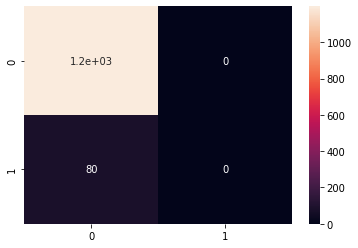

In [54]:
# Heatmap menggunakan SNS

sns.heatmap(logRes_cn, annot=True)